In [1]:
%load_ext autoreload
%autoreload 2

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, stats

import time

import networkx as nx
from networkx.algorithms import approximation as apx

import pandas as pd
import random

import landscape as ld
import steiner_utils as su

In [3]:
def get_pos(g):
    '''returns dictionary with nodes physical location'''
    return dict( (n, n) for n in g.nodes() )

# Example 1

## Naive Steiner

In [5]:
terminals_1 = [(1, 1), (2, 2), (3, 4), (5, 1), (5, 4), (8, 2), (7, 8), (6,  6), (2,8), (4,3)]
G_1 = su.create_graph(box_size = 10, terminals = terminals_1)

In [6]:
su.graph_info(G_1, verbosity = True)

Number of clusters: 1; Number of nodes: 81; Number of edges: 144; Number of terminals: 10


(1, 81, 144, 10)

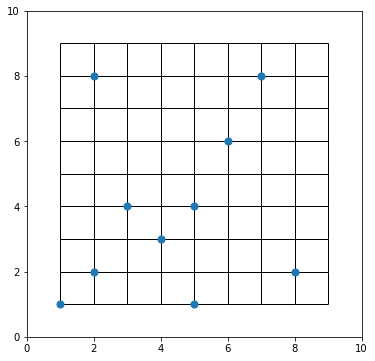

In [7]:
su.plot_graph_on_grid(G_1, box_size = 10)

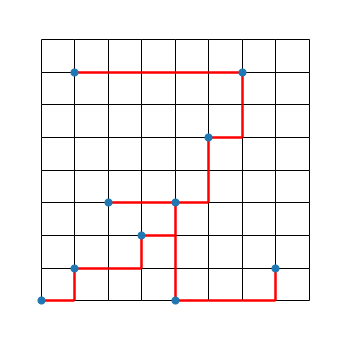

In [8]:
steiner_1 = su.naive_steiner(G_1)
su.plot_graph_on_grid(G_1, box_size = 10, tree = steiner_1)

## Improved Steiner

In [9]:
# create graph with terminals
terminals_1 = [(1, 1), (2, 2), (3, 4), (5, 1), (5, 4), (8, 2), (7, 8), (6,  6), (2,8), (4,3)]
G_1 = su.create_graph(box_size = 10, terminals = terminals_1)

In [10]:
# obtain clusters by using landscape and condition on subgraphs 
clusters_1 = su.trim_graph_landscape(G_1, box_size = 10, condition = 'n_clusters <= 2')

Properties of the original graph: 
Number of clusters: 1; Number of nodes: 81; Number of edges: 144; Number of terminals: 10


For alpha =  0.5
Number of clusters: 6; Number of nodes: 45; Number of edges: 45; Number of terminals: 10
For alpha =  0.55
Number of clusters: 5; Number of nodes: 46; Number of edges: 50; Number of terminals: 10
For alpha =  0.6
Number of clusters: 5; Number of nodes: 47; Number of edges: 52; Number of terminals: 10
For alpha =  0.65
Number of clusters: 5; Number of nodes: 50; Number of edges: 55; Number of terminals: 10
For alpha =  0.7
Number of clusters: 5; Number of nodes: 52; Number of edges: 59; Number of terminals: 10
For alpha =  0.75
Number of clusters: 2; Number of nodes: 53; Number of edges: 64; Number of terminals: 10


In [11]:
# compute partial steiners
partial_steiners = list(map(su.naive_steiner, clusters_1))

#join steiners
full_steiner_1 = su.join_all_trees(G_1, partial_steiners)

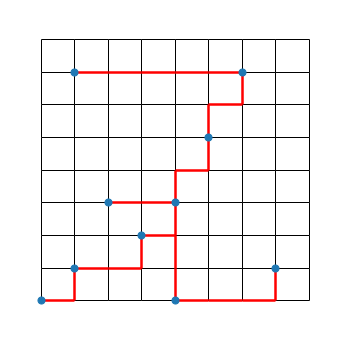

In [12]:
su.plot_graph_on_grid(G_1, box_size = 10, tree = full_steiner_1)

# Example 2
Points selected at random. 

boundary effects:
- spurious paths along boundary

In [65]:
L0 = 50; Nterm = 350
terminals_2 = su.make_random_terminals(box_size = L0, Nterminals = Nterm)
G_2 = su.create_graph(box_size = L0, terminals = terminals_2)
su.graph_info(G_2, verbosity = False)

(1, 2401, 4704, 321)

In [75]:
tic = time.time()
steiner_2 = su.naive_steiner(G_2)

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))

Calculation took 61.4937539100647 sec


In [78]:
len(steiner_2)

692

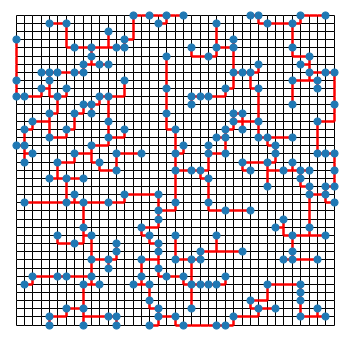

In [58]:
su.plot_graph_on_grid(G_2, box_size = L0, tree = steiner_2)

In [68]:
def improved_steiner(G, box_size, condition):
    
    clusters = su.trim_graph_landscape(G, box_size = L0, condition = condition)
    
    #print('Computing Steiners in {} clusters'.format(len(clusters)) )
    
    partial_steiners = list(map(su.naive_steiner, clusters))
    
    full_steiner = su.join_all_trees(G, partial_steiners)
    
    return full_steiner

In [76]:
tic = time.time()
full_steiner_2 = improved_steiner(G_2, box_size = L0, condition = 'n_clusters <= 6')

toc = time.time()
print('Calculation took {} sec'.format(toc-tic))

Calculation took 53.362611293792725 sec


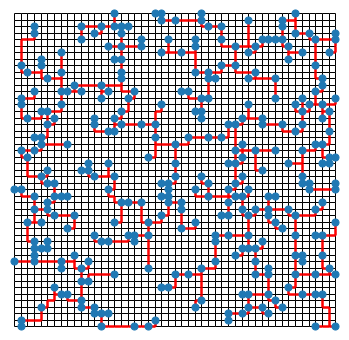

In [77]:
su.plot_graph_on_grid(G_2, box_size = L0, tree = full_steiner_2)